In [8]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from pathlib import Path
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

In [39]:
clf = lgb.Booster(model_file="../data/06_models/lgb_2020-02-29 14:52:36.018540.txt")
clf2 = lgb.Booster(model_file="../data/06_models/lgb_2020-02-29 16:49:16.986016.txt")

In [24]:
clf.params["objective"] = "multiclass"

In [19]:
shap.initjs()

In [25]:
explainer = shap.TreeExplainer(model=clf, feature_dependence='feature_perturbation', model_output='margin')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [26]:
df = pd.read_csv("../data/04_features/train2_csv")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,1,0,0,0,0,0,0,0,0,0,...,2.782487,4.241338,-0.216795,-1.068926,-5.638154,-4.319345,4.509070,-4.584431,4.549771,-1.093209
1,0,0,0,0,0,0,0,1,0,0,...,-0.671809,0.321571,-1.606923,0.489524,0.054473,0.413378,-0.135446,0.529382,-0.655857,-0.653374
2,0,0,0,0,0,0,0,1,0,0,...,-0.976378,2.027967,-0.646637,-0.984836,-1.387308,-0.903929,-1.283536,0.941530,1.409830,-0.569002
3,1,0,0,1,6,1,5,0,0,1,...,6.509618,8.980192,-0.057713,-2.362669,1.285951,-0.734621,-1.005229,2.073912,2.988509,-0.804478
4,0,0,0,0,0,0,0,0,0,0,...,-0.587283,0.493157,-0.992098,1.094098,-1.032562,0.569357,0.050036,1.827078,-0.144427,0.402420


In [30]:
shap_values = explainer.shap_values(X=train.iloc[:1000])

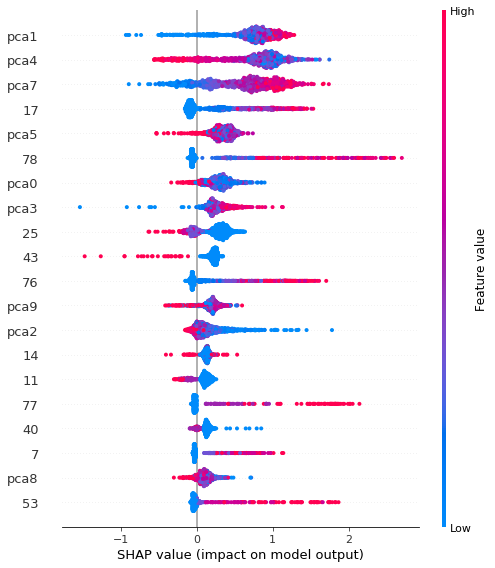

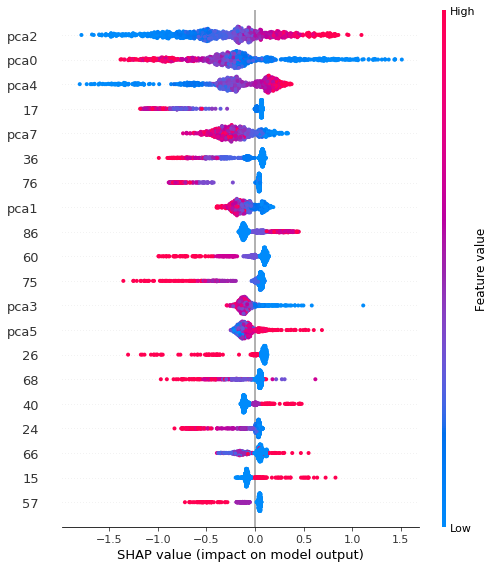

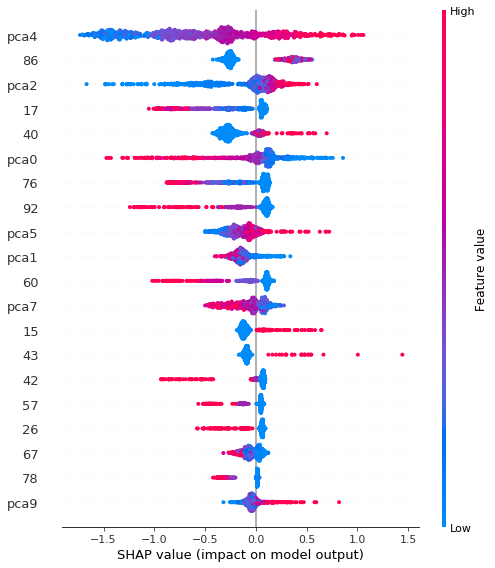

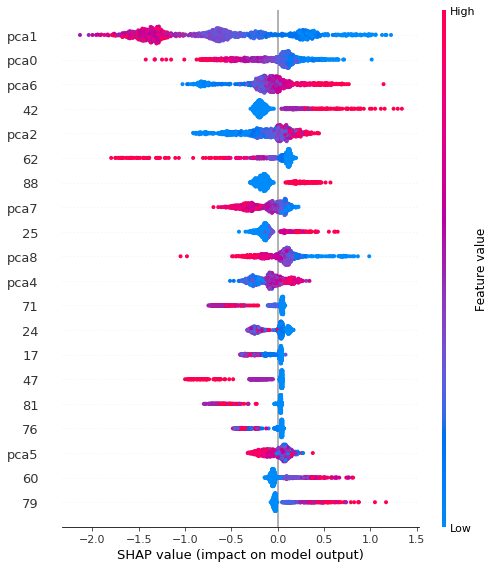

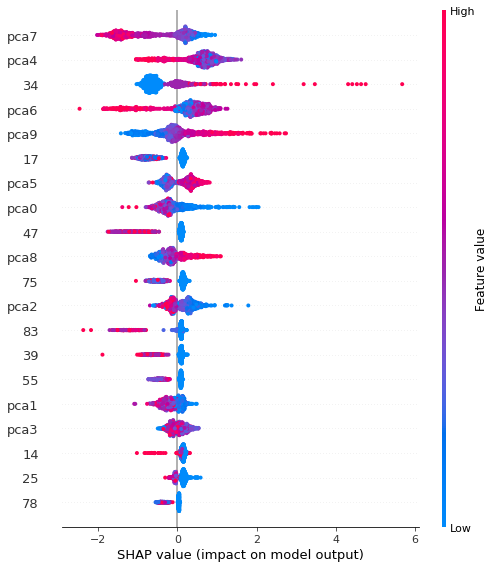

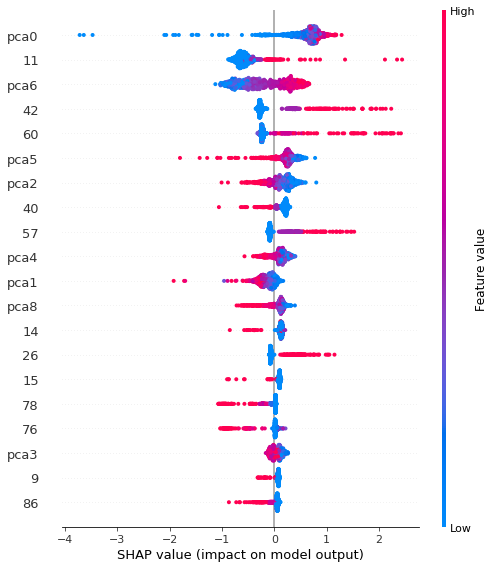

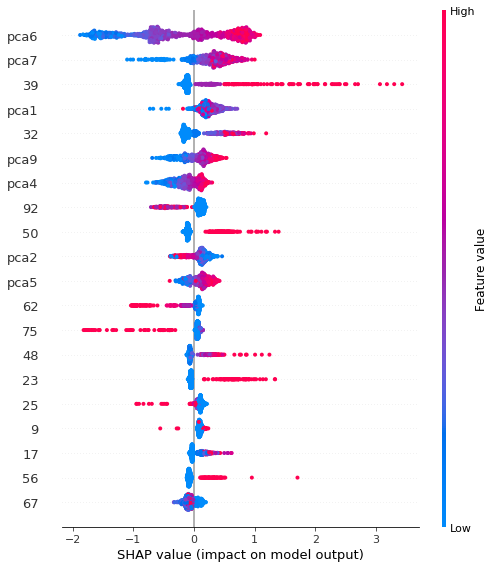

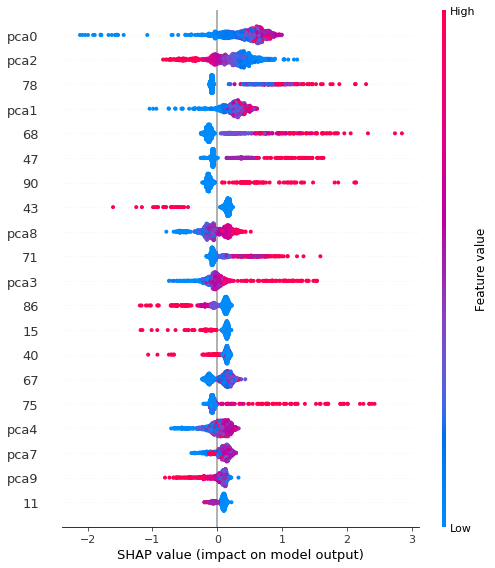

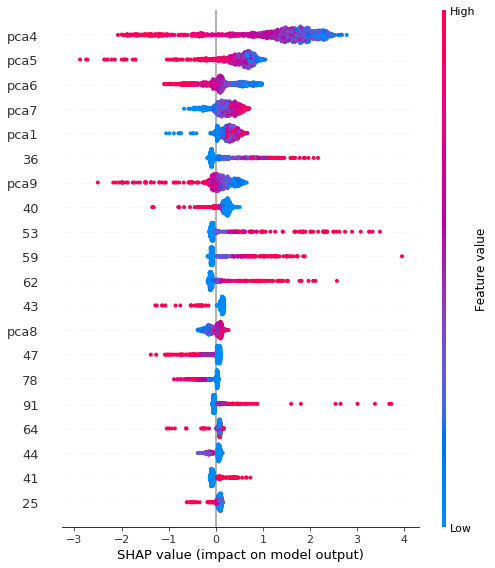

IndexError: list index out of range

In [38]:
for i in range(10):
    shap.summary_plot(shap_values[i], train.iloc[:1000])

In [34]:
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values[0], features=train[:1000])

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [43]:
test = df[:len(target)]

NameError: name 'target' is not defined